<div style="background-color: #007ACC; padding: 30px; border-radius: 20px;">
    <h1 style="color: white; text-align: center;">E-commerce Product Delivery Prediction</h1>
    <h3 style="color: white; text-align: center;">OBJECTIVE: Develop robust machine learning models to accurately predict product delivery timeliness. By utilizing these models, the company aims to improve customer satisfaction, optimize logistics, and gain insights into factors affecting delivery performance. </h3>
</div>

<h1 style="color: navy; text-align: center; font-size: 25px;">
📌 Importing Required Libraries
</h1>

<p style="font-size: 15px; color: darkblue;">
To build and evaluate machine learning models, we need several Python libraries. Below is a categorized list of the required imports and their functionalities.
</p>

<h2 style="color: darkred; font-size: 20px;">📦 1️⃣ Data Handling & Processing</h2>
<ul style="font-size: 15px;">
    <li><b>pandas</b> (<code>import pandas as pd</code>) - Used for data manipulation and analysis.</li>
    <li><b>numpy</b> (<code>import numpy as np</code>) - Provides support for numerical computations.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px;">📊 2️⃣ Data Visualization</h2>
<ul style="font-size: 15px;">
    <li><b>seaborn</b> (<code>import seaborn as sns</code>) - Creates attractive and informative statistical graphics.</li>
    <li><b>matplotlib.pyplot</b> (<code>import matplotlib.pyplot as plt</code>) - Used for generating plots and figures.</li>
</ul>

<h2 style="color: darkorange; font-size: 20px;">⚠️ 3️⃣ Handling Warnings</h2>
<ul style="font-size: 15px;">
    <li><b>warnings</b> (<code>import warnings</code>) - Suppresses unnecessary warnings to keep output clean.</li>
</ul>

<h2 style="color: purple; font-size: 20px;">📚 4️⃣ Machine Learning - Model Selection & Preprocessing</h2>
<ul style="font-size: 15px;">
    <li><b>train_test_split</b> - Splits dataset into training & testing sets.</li>
    <li><b>GridSearchCV</b> - Performs hyperparameter tuning using cross-validation.</li>
    <li><b>cross_val_score</b> - Evaluates model performance using cross-validation.</li>
    <li><b>StandardScaler</b> - Standardizes feature values.</li>
    <li><b>LabelEncoder</b> - Converts categorical labels to numeric form.</li>
</ul>

<h2 style="color: teal; font-size: 20px;">🤖 5️⃣ Machine Learning Models</h2>
<ul style="font-size: 15px;">
    <li><b>LogisticRegression</b> - Used for binary classification.</li>
    <li><b>DecisionTreeClassifier</b> - A tree-based model for decision making.</li>
    <li><b>RandomForestClassifier</b> - An ensemble of decision trees.</li>
    <li><b>KNeighborsClassifier</b> - A classification model based on nearest neighbors.</li>
</ul>

<h2 style="color: brown; font-size: 20px;">📏 6️⃣ Model Evaluation Metrics</h2>
<ul style="font-size: 15px;">
    <li><b>accuracy_score</b> - Measures overall correctness of predictions.</li>
    <li><b>precision_score</b> - Measures accuracy of positive class predictions.</li>
    <li><b>recall_score</b> - Evaluates how well actual positives are captured.</li>
    <li><b>f1_score</b> - Harmonic mean of precision and recall.</li>
    <li><b>confusion_matrix</b> - Shows model performance with true/false positives and negatives.</li>
    <li><b>roc_auc_score</b> - Measures classification performance using AUC-ROC.</li>
    <li><b>roc_curve</b> - Plots trade-off between true and false positive rates.</li>
</ul>

<h2 style="color: darkblue; font-size: 20px;">💾 7️⃣ Model Saving & Loading</h2>
<ul style="font-size: 15px;">
    <li><b>joblib</b> - Used for saving and loading machine learning models.</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings         
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Suppress warnings
warnings.filterwarnings("ignore")

<h1 style="color: navy; text-align: center; font-size: 25px;background-color: #f4f4f4; padding: 10px; border-radius: 10px">
📂 Loading the Dataset
</h1>

<p style="font-size: 15px; color: darkblue;">
To begin our analysis, we will load the dataset from an Excel file and explore its structure. The dataset is stored in the following path:
</p>

<pre style="background-color: #f4f4f4; padding: 10px; font-size: 15px;">
D:\python\Capstone_Project\E_Commerce.xlsx
</pre>

<h2 style="color: darkred; font-size: 20px;">📌 Steps Involved</h2>
<ul style="font-size: 15px;">
    <li>🔹 Read the dataset using <b>pandas</b> <code>read_excel()</code> function.</li>
    <li>🔹 Display the first few rows using <code>head()</code>.</li>
    <li>🔹 Check dataset structure using <code>info()</code>.</li>
</ul>

In [3]:
# Load dataset
file_path = r"D:\python\Capstone_Project\E_Commerce.xlsx"
df = pd.read_excel(file_path)
df.info()

# Display dataset information
print("Dataset Preview:\n", df.head())
print("\nDataset Information:\n", df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
Dataset Preview:
    ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                   

<h1 style="color: navy; text-align: center; font-size: 25px;background-color: #f4f4f4; padding: 10px; border-radius: 10px">
🧹 Data Cleaning: Removing Unnecessary Columns & Handling Missing Values
</h1>

<p style="font-size: 15px; color: darkblue;">
Before proceeding with data analysis, we need to clean the dataset by:
</p>

<h2 style="color: darkred; font-size: 20px;">🛑 1️⃣ Removing Unnecessary Columns</h2>
<ul style="font-size: 15px;">
    <li>🔹 Some columns, like <b><code>ID</code></b>, may not provide useful insights.</li>
    <li>🔹 We use <code>drop(columns=['ID'], inplace=True, errors='ignore')</code> to remove them.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px;">❌ 2️⃣ Handling Missing Values</h2>
<ul style="font-size: 15px;">
    <li>🔹 Missing values can affect model performance.</li>
    <li>🔹 We use <code>dropna(inplace=True)</code> to remove rows with missing values.</li>
</ul>

In [4]:
# Drop unnecessary columns (e.g., ID)
df.drop(columns=['ID'], inplace=True, errors='ignore')

# Drop rows with null values
df.dropna(inplace=True)



<h1 style="color: navy; text-align: center; font-size: 25px;background-color: #f4f4f4; padding: 10px; border-radius: 10px">
🔍 Identifying Categorical Columns
</h1>

<p style="font-size: 15px; color: darkblue;">
Categorical columns contain text or labels instead of numerical values. Identifying them is essential for:
</p>

<h2 style="color: darkred; font-size: 20px;">📌 Why Identify Categorical Columns?</h2>
<ul style="font-size: 15px;">
    <li>🔹 Required for <b>encoding</b> (e.g., One-Hot Encoding, Label Encoding).</li>
    <li>🔹 Helps in <b>feature selection</b> and preprocessing.</li>
    <li>🔹 Used for <b>data visualization</b> to analyze patterns.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px;">🛠 How We Identify Them</h2>
<ul style="font-size: 15px;">
    <li>🔹 Use <code>select_dtypes(include=['object'])</code> to filter categorical columns.</li>
    <li>🔹 Display the list of identified categorical columns.</li>
</ul>

In [5]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

<h1 style="color: navy; text-align: center; font-size: 25px;background-color: #f4f4f4; padding: 10px; border-radius: 10px ">
🔠 Encoding Categorical Data & Identifying Target Column
</h1>

<p style="font-size: 15px; color: darkblue;">
Before training our machine learning model, we need to ensure all categorical data is converted into numerical format. This process is known as <b>Label Encoding</b>.
</p>

<h2 style="color: darkred; font-size: 20px; ">🛠 1️⃣ Label Encoding</h2>
<ul style="font-size: 15px; color: black;">
    <li>🔹 Converts categorical text values into numerical labels.</li>
    <li>🔹 Uses <code>LabelEncoder()</code> from <b>scikit-learn</b>.</li>
    <li>🔹 Each category is assigned a unique integer value.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px; ">🎯 2️⃣ Identifying the Target Column</h2>
<ul style="font-size: 15px; color: black;">
    <li>🔹 Dynamically searches for the target column based on keywords like <code>'reach'</code>.</li>
    <li>🔹 Ensures the correct column is selected before model training.</li>
</ul>


In [6]:
# Convert categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Identify the correct target column dynamically
target_col = None
for col in df.columns:
    if "reach" in col.lower():  # Check if any column matches expected name
        target_col = col
        break

if not target_col:
    raise ValueError("Target column for delivery status not found. Please check dataset column names.")

print(f"Using Target Column: {target_col}")


Using Target Column: Reached.on.Time_Y.N


<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
📊 Exploratory Data Analysis (EDA)
</h1>

<p style="font-size: 15px; color: darkblue;">
Before training our machine learning model, it's essential to explore the dataset to understand patterns, distributions, and potential issues such as class imbalances.
</p>

<h2 style="color: darkred; font-size: 20px; ">🎯 1️⃣ Target Variable Distribution</h2>
<ul style="font-size: 15px; color: black;">
    <li>🔹 Visualizing the frequency of different classes in our target variable.</li>
    <li>🔹 Helps identify class imbalance, which can impact model performance.</li>
</ul>

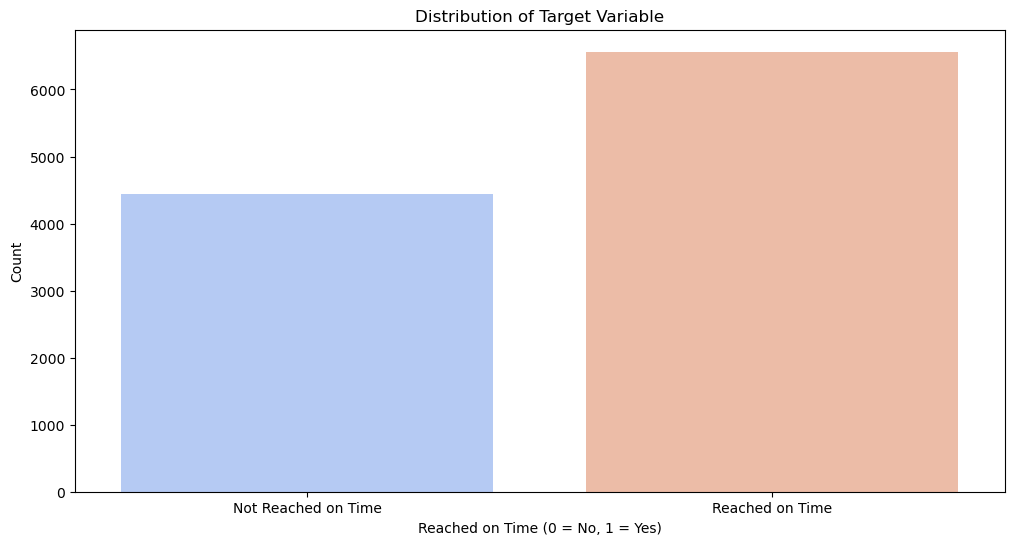

In [7]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.countplot(x=df[target_col], palette='coolwarm')
plt.title('Distribution of Target Variable')
plt.xlabel("Reached on Time (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Reached on Time', 'Reached on Time'])
plt.show()



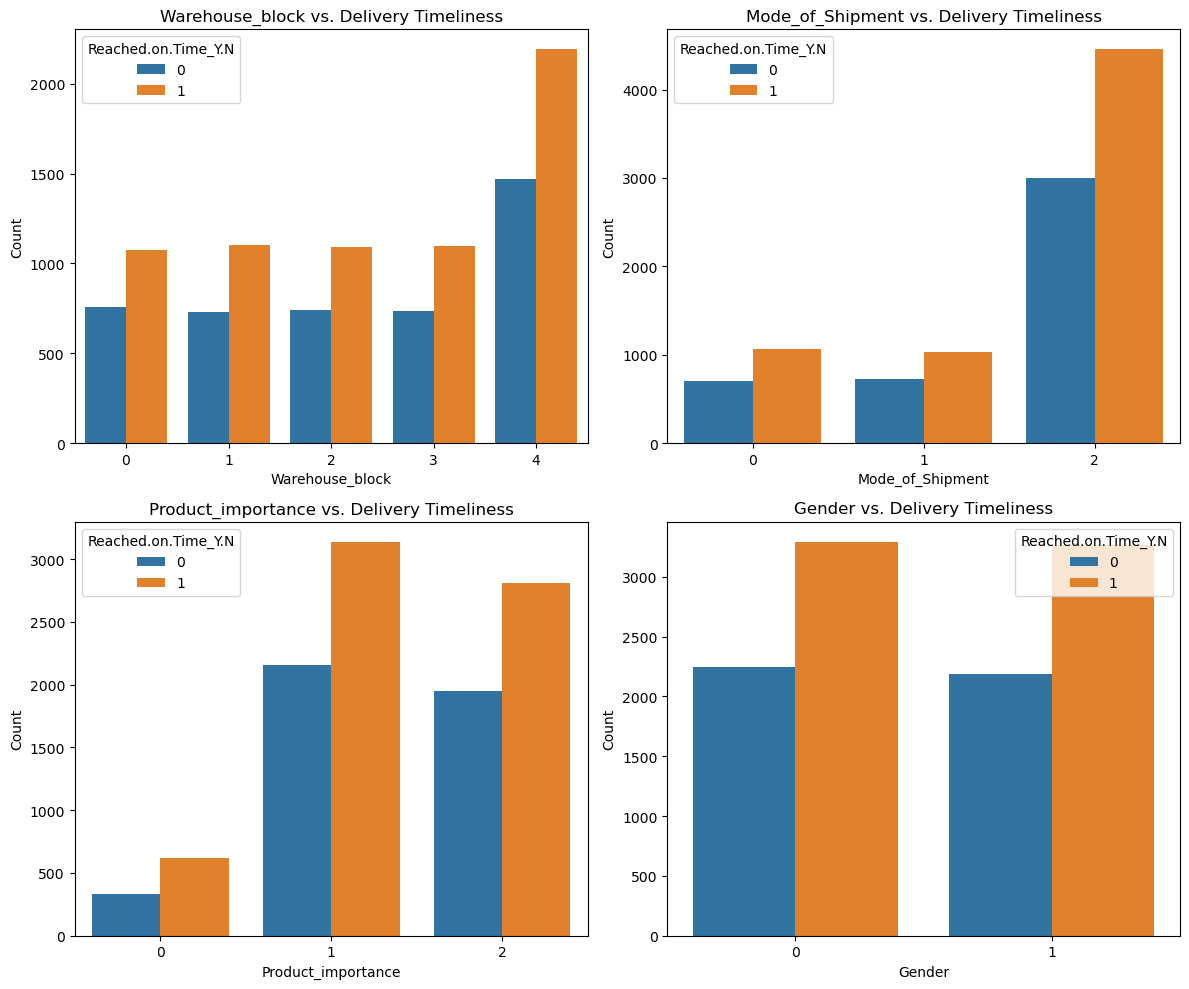

In [8]:
# Set figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define plot settings
plot_settings = [
    ("Warehouse_block", "Warehouse_block vs. Delivery Timeliness", axes[0, 0]),
    ("Mode_of_Shipment", "Mode_of_Shipment vs. Delivery Timeliness", axes[0, 1]),
    ("Product_importance", "Product_importance vs. Delivery Timeliness", axes[1, 0]),
    ("Gender", "Gender vs. Delivery Timeliness", axes[1, 1])
]

# Create count plots
for column, title, ax in plot_settings:
    sns.countplot(data=df, x=column, hue="Reached.on.Time_Y.N", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
📌 Identifying Numerical & Categorical Features
</h1>

<p style="font-size: 15px; color: darkblue;">
Understanding the type of features in our dataset is essential for preprocessing and model selection. Features can be broadly classified into:
</p>

<h2 style="color: darkred; font-size: 20px;">🔢 Numerical Features</h2>
<ul style="font-size: 15px; color: black;">
    <li>🔹 Includes integers (<code>int64</code>) and floating-point numbers (<code>float64</code>).</li>
    <li>🔹 Used for mathematical operations and statistical analysis.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px; ">🔠 Categorical Features</h2>
<ul style="font-size: 15px; color: black;">
    <li>🔹 Includes object or category data types (<code>object</code>, <code>category</code>).</li>
    <li>🔹 Represent non-numeric values such as labels or categories.</li>
</ul>

In [9]:
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
📊 Visualizing Numerical Features
</h1>

<p style="font-size: 15px; color: darkblue;">
To better understand our dataset, we analyze numerical features using three key plots:
</p>

<h2 style="color: darkred; font-size: 20px; ">📈 Histogram</h2>
<ul style="font-size: 15px; color: black;">
    <li>🔹 Shows the frequency distribution of a numerical feature.</li>
    <li>🔹 Helps identify skewness and data spread.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px; ">📦 Boxplot</h2>
<ul style="font-size: 15px; color: black;">
    <li>🔹 Displays the median, quartiles, and potential outliers.</li>
    <li>🔹 Useful for detecting anomalies in the dataset.</li>
</ul>

<h2 style="color: purple; font-size: 20px; "> 📈 KDE Plot</h2>
<ul style="font-size: 15px; color: black;">
    <li>🔹 Estimates the probability density function (PDF) of the data.</li>
    <li>🔹 Helps visualize data distribution more smoothly than a histogram.</li>
</ul>

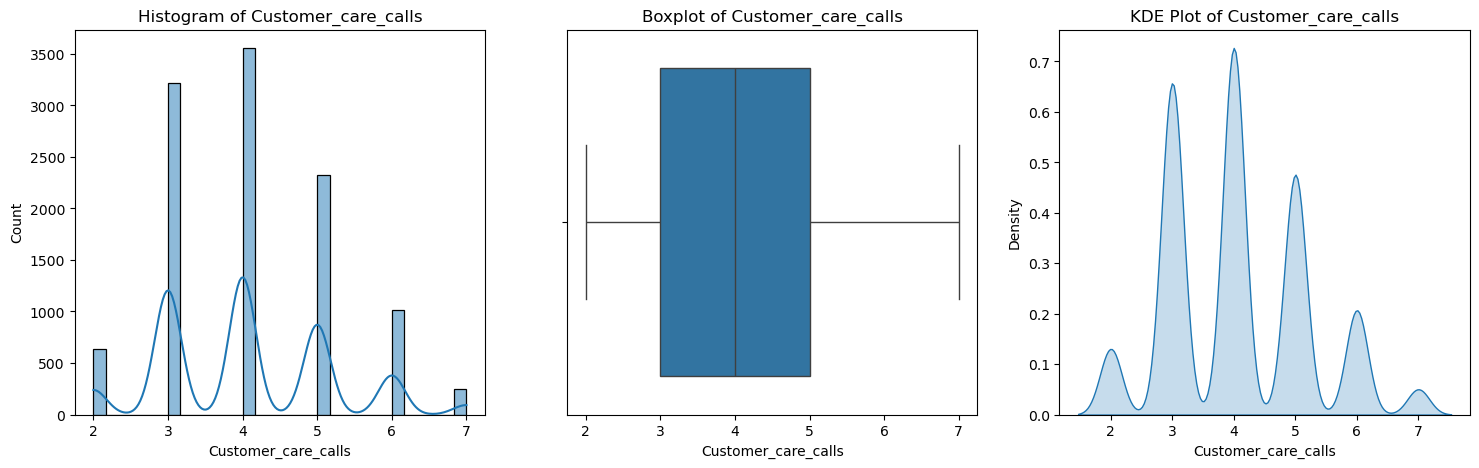

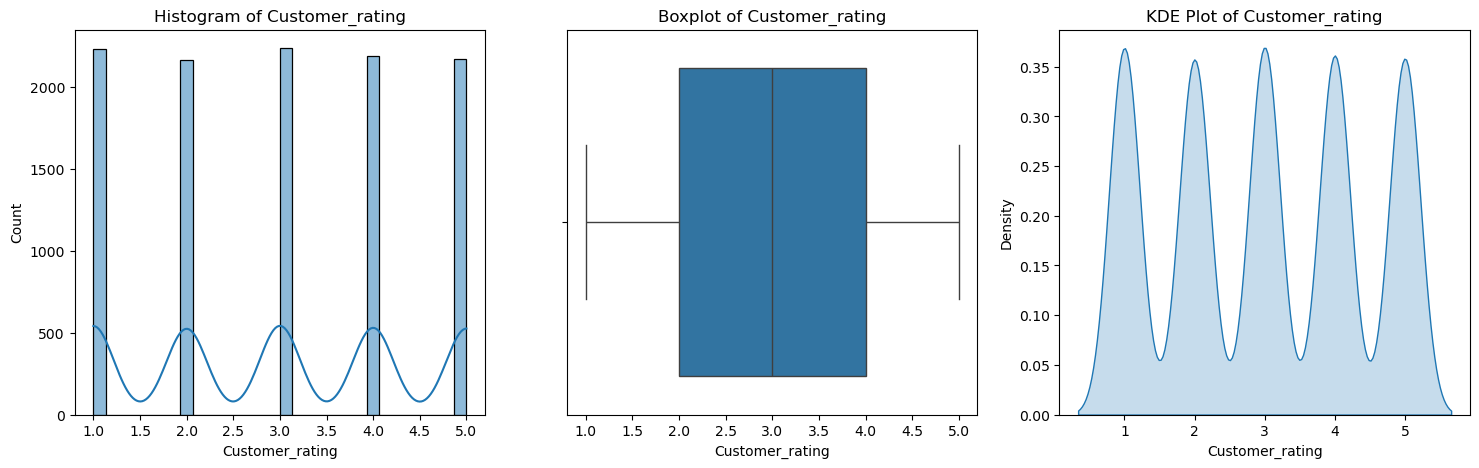

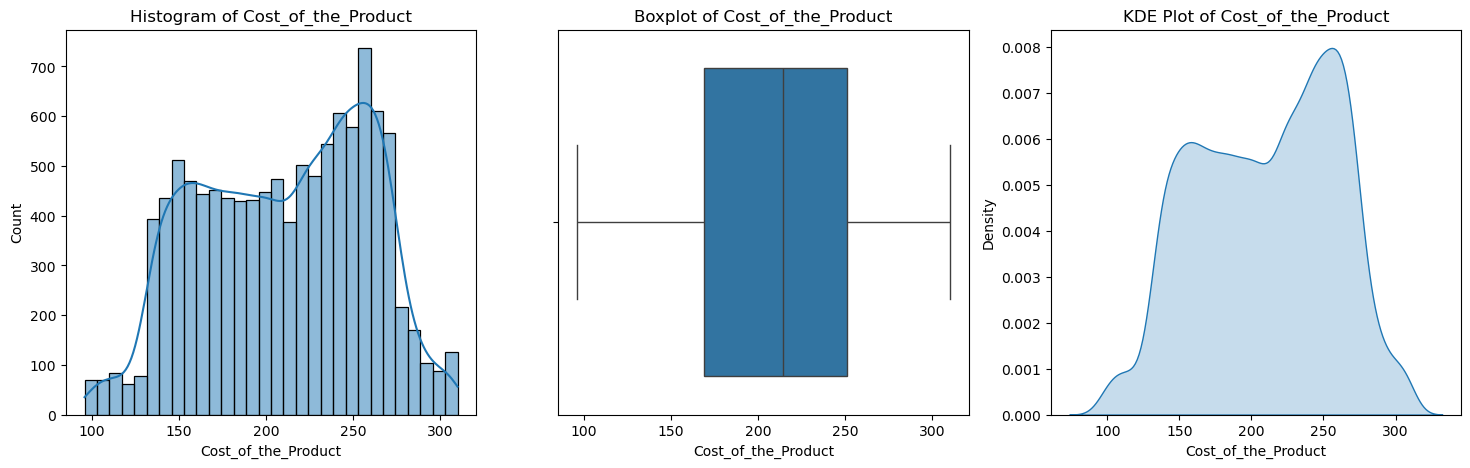

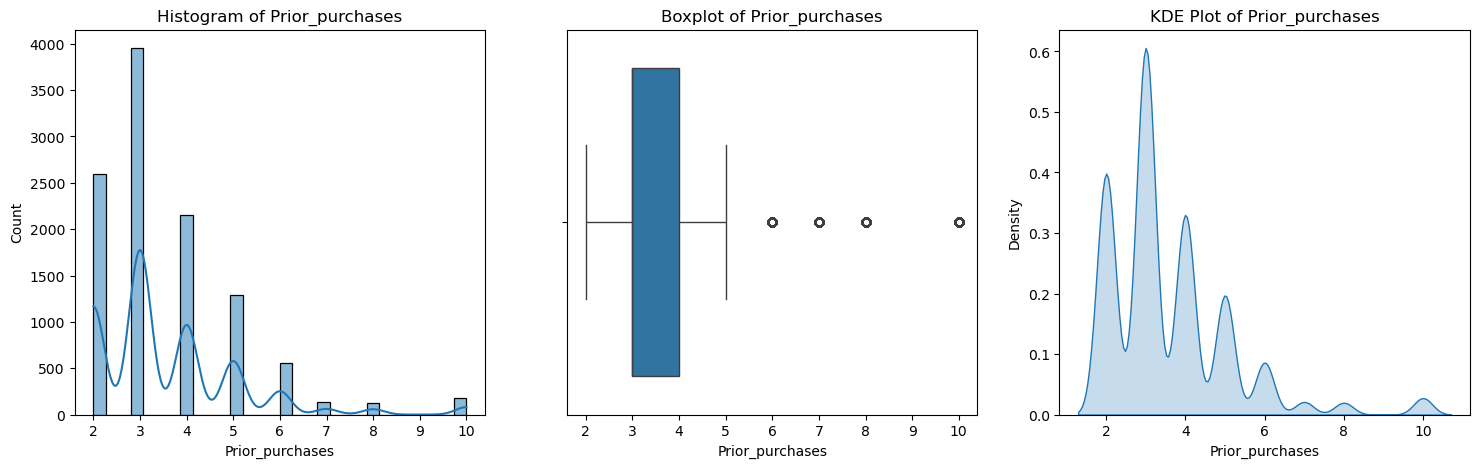

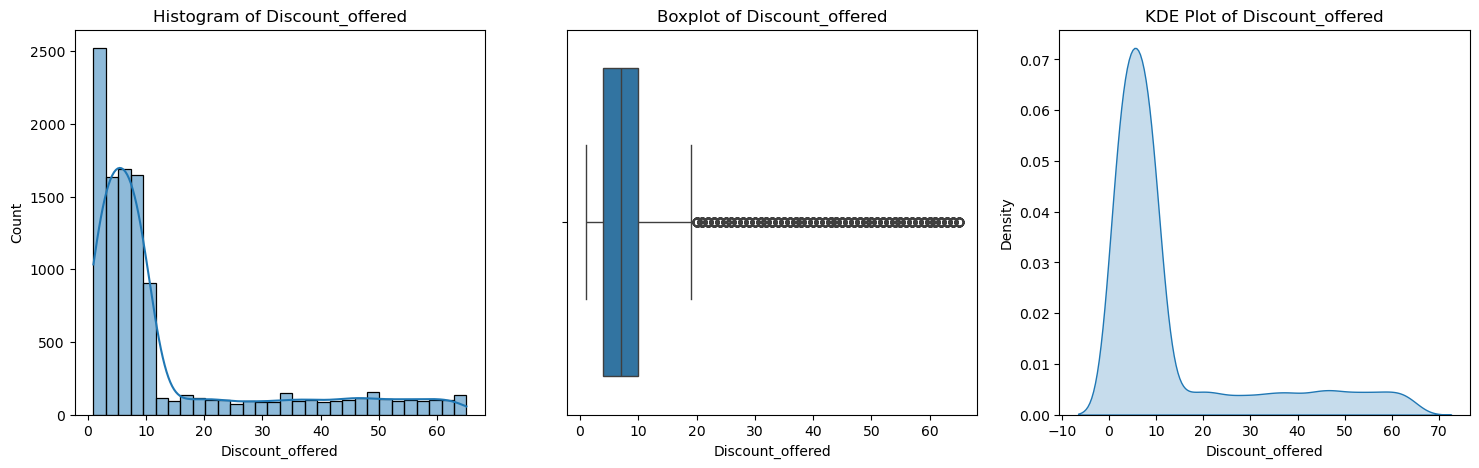

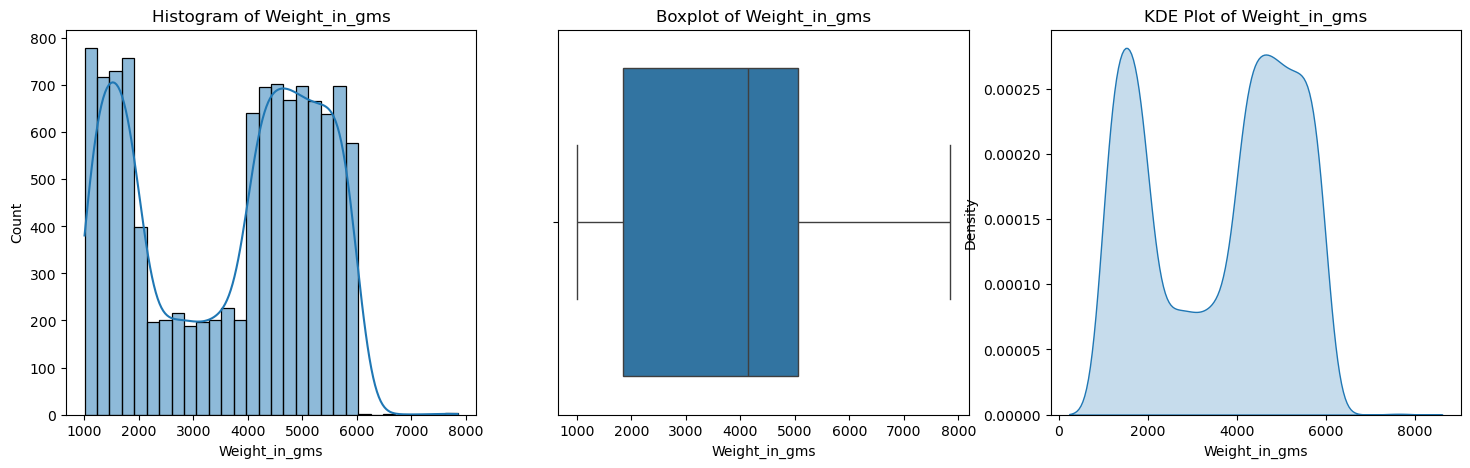

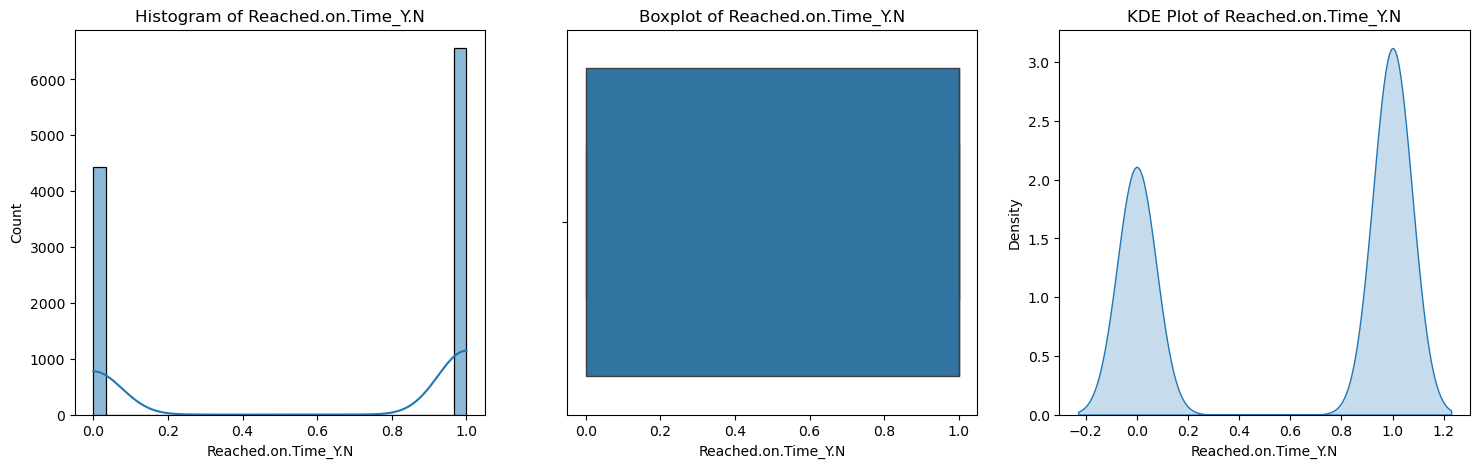

In [10]:
# Plot numerical features
for feature in numerical_features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {feature}')
    
    sns.boxplot(x=df[feature], ax=axes[1])
    axes[1].set_title(f'Boxplot of {feature}')
    
    sns.kdeplot(df[feature], fill=True, ax=axes[2])
    axes[2].set_title(f'KDE Plot of {feature}')
    
    plt.show()

# Plot categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.show()



<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
📊 Correlation Heatmap
</h1>

<p style="font-size: 15px; color: darkblue;">
A <b>correlation heatmap</b> helps us visualize the relationships between numerical features in our dataset.  
</p>

<ul style="font-size: 15px; color: black;">
    <li>🔹 Identifies strong positive or negative relationships between features.</li>
    <li>🔹 Helps detect <b>multicollinearity</b> (when features are too similar).</li>
    <li>🔹 Useful for <b>feature selection</b> by removing highly correlated predictors.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px;">🧩 Interpretation:</h2>
<ul style="font-size: 15px;">
    <li><b style="color: red;">🔴 Closer to +1:</b> Strong positive correlation (features increase together).</li>
    <li><b style="color: blue;">🔵 Closer to -1:</b> Strong negative correlation (one increases, the other decreases).</li>
    <li><b style="color: gray;">⚪ Closer to 0:</b> Weak or no correlation.</li>
</ul>

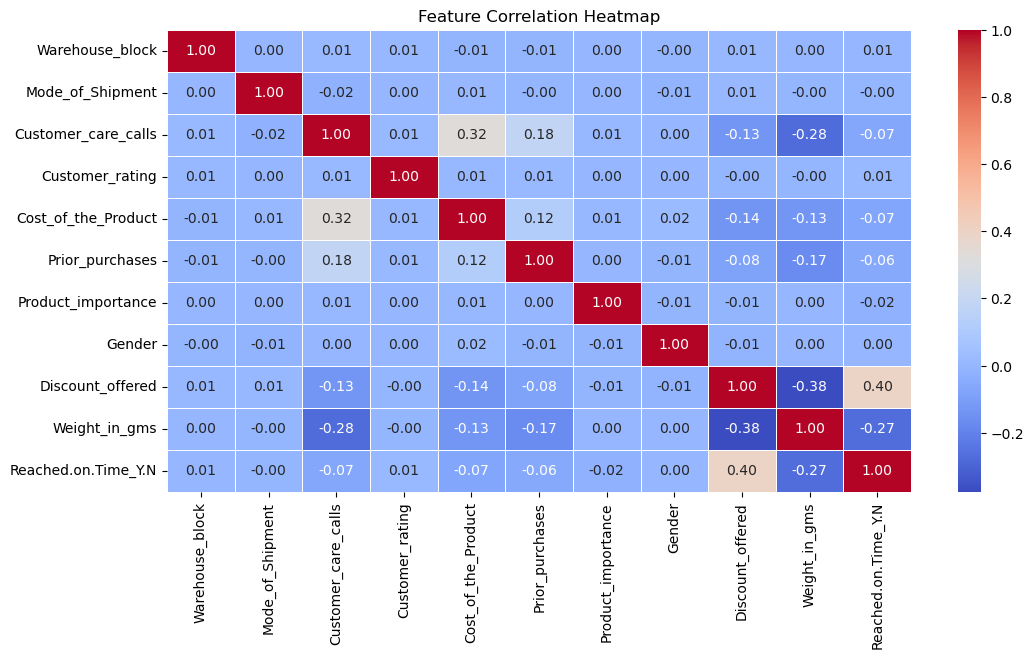

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
📦 Boxplot for Outlier Detection
</h1>

<p style="font-size: 15px; color: darkblue;">
A <b>Boxplot</b> helps in detecting <b>outliers</b> in our dataset. Outliers can impact model performance, so identifying them is crucial.
</p>

<ul style="font-size: 15px; color: black;">
    <li>🔹 An extreme data point that differs significantly from others.</li>
    <li>🔹 Detected using the <b>Interquartile Range (IQR) method</b>.</li>
    <li>🔹 Outliers appear as individual points outside the <b>whiskers</b> of the boxplot.</li>
</ul>
<ul style="font-size: 15px;">
    <li>✅ Improves model accuracy by reducing noise.</li>
    <li>✅ Prevents biased results in statistical analysis.</li>
    <li>✅ Helps in deciding whether to <b>remove</b> or <b>transform</b> extreme values.</li>
</ul>

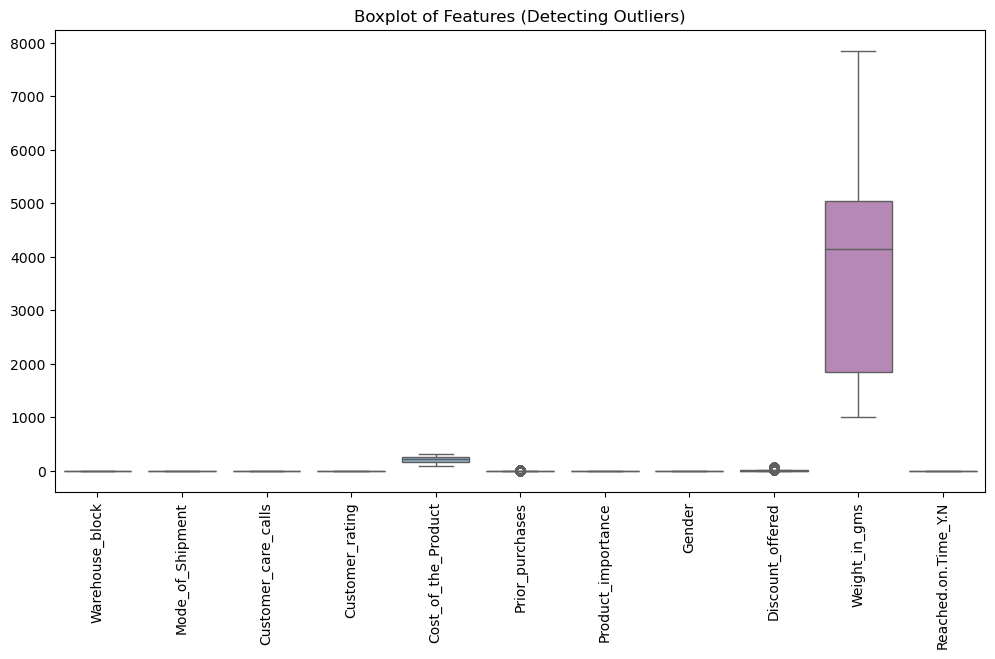

In [12]:
# Boxplot for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set3")
plt.title("Boxplot of Features (Detecting Outliers)")
plt.xticks(rotation=90)
plt.show()



<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
📏 Feature Scaling (Standardization)
</h1>

<p style="font-size: 15px; color: darkblue;">
Feature scaling is essential for machine learning models, especially those that rely on distance-based calculations (e.g., <b>KNN</b>, <b>Logistic Regression</b>). Standardization ensures that all numerical features have a mean of <b>0</b> and a standard deviation of <b>1</b>.
</p>

<h2 style="color: darkred; font-size: 20px;">⚙️  Standardization</h2>
<ul style="font-size: 15px;">
    <li>Prevents features with larger values from dominating the model.</li>
    <li>Helps models converge faster and perform better.</li>
    </ul>
<ul style="font-size: 15px;">
    <li>Uses the formula: <code>(X - mean) / std</code>.</li>
    <li>Brings all numerical features to the same scale.</li>
    <li>Implemented using <b>StandardScaler</b> from scikit-learn.</li>
</ul>

In [13]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
numeric_cols = ['Cost_of_the_Product', 'Weight_in_gms']  # Adjust column names
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
🔀 Splitting the Dataset into Training & Testing Sets
</h1>

<p style="font-size: 15px; color: darkblue;">
To evaluate the performance of our machine learning model, we divide the dataset into training and testing sets. The training set is used to train the model, while the test set helps assess its accuracy on unseen data.
</p>

<h2 style="color: darkred; font-size: 20px;">📌  Splitting the Dataset</h2>
<ul style="font-size: 15px;">
    <li>🔹 Prevents overfitting by evaluating the model on unseen data.</li>
    <li>🔹 Helps measure model performance using metrics like <b>accuracy</b>, <b>precision</b>, and <b>recall</b>.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px;">🛠 Splitting Strategy</h2>
<ul style="font-size: 15px;">
    <li>✅ Uses <b>train_test_split</b> from <b>scikit-learn</b>.</li>
    <li>✅ Allocates <b>80%</b> of data for training and <b>20%</b> for testing.</li>
    <li>✅ Uses <code>random_state=42</code> to ensure reproducibility.</li>
</ul>

In [14]:
# Splitting dataset
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
🤖 Machine Learning Model Selection
</h1>

<p style="font-size: 15px; color: darkblue;">
We will experiment with different machine learning models to identify the best-performing algorithm for our dataset. The models included are:
</p>

<h2 style="color: darkred; font-size: 20px;">📌 Models Considered</h2>
<ul style="font-size: 15px;">
    <li>📊 <b>Logistic Regression</b> - A statistical model used for binary classification.</li>
    <li>🌳 <b>Decision Tree</b> - A tree-based model that makes decisions by splitting features.</li>
    <li>🌲 <b>Random Forest</b> - An ensemble learning method combining multiple decision trees.</li>
    <li>🔍 <b>K-Nearest Neighbors (KNN)</b> - A distance-based algorithm that classifies based on similarity.</li>
</ul>

<h2 style="color: darkgreen; font-size: 25px;">🛠 Implementation</h2>
<p style="font-size: 15px; color: black;">
The models are stored in a dictionary to allow easy iteration during training and evaluation.
</p>

In [15]:
# Model dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
⚙️ Hyperparameter Tuning & Model Evaluation
</h1>

<p style="font-size: 15px; color: darkblue;">
To improve model performance, we use <b>GridSearchCV</b> to find the best hyperparameters before training. 
This ensures that each model is optimized for better accuracy and generalization.
</p>

<h2 style="color: darkred; font-size: 20px;">🎯  Hyperparameter Tuning</h2>
<ul style="font-size: 15px;">
    <li>🔹 Finds the best combination of hyperparameters for each model.</li>
    <li>🔹 Uses cross-validation (<code>cv=5</code>) to prevent overfitting.</li>
    <li>🔹 Evaluates models based on <b>ROC-AUC score</b>.</li>
</ul>

<h2 style="color: darkgreen; font-size: 20px;">📊 Model Evaluation Metrics</h2>
<ul style="font-size: 15px;">
    <li>✅ <b>Accuracy</b> - Overall correctness of the model.</li>
    <li>✅ <b>Precision</b> - Focuses on correctly predicted positive cases.</li>
    <li>✅ <b>Recall</b> - Measures how well the model identifies positive cases.</li>
    <li>✅ <b>F1-Score</b> - Balances Precision & Recall.</li>
    <li>✅ <b>ROC-AUC</b> - Evaluates the model's ability to distinguish between classes.</li>
</ul>



Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}

Tuning Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Tuning KNN...
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Logistic Regression Model Performance:
Accuracy: 0.63, Precision: 0.69, Recall: 0.69, F1 Score: 0.69, ROC-AUC: 0.72
Confusion Matrix:
 [[492 403]
 [401 904]]

Decision Tree Model Performance:
Accuracy: 0.67, Precision: 0.80, Recall: 0.59, F1 Score: 0.68, ROC-AUC: 0.74
Confusion Matrix:
 [[696 199]
 [529 776]]

Random Forest Model Performance:
Accuracy: 0.68, Precision: 0.85, Recall: 0.56, F1 Score: 0.68, ROC-AUC: 0.75
Confusion Matrix:
 [[769 126]
 [570 735]]

KNN Model Performance:
Accuracy: 0.63, Precision: 0.70, Recall: 0.65, F1 Score: 0.67, ROC-AUC: 0.71
Confusion Matrix:
 [[5

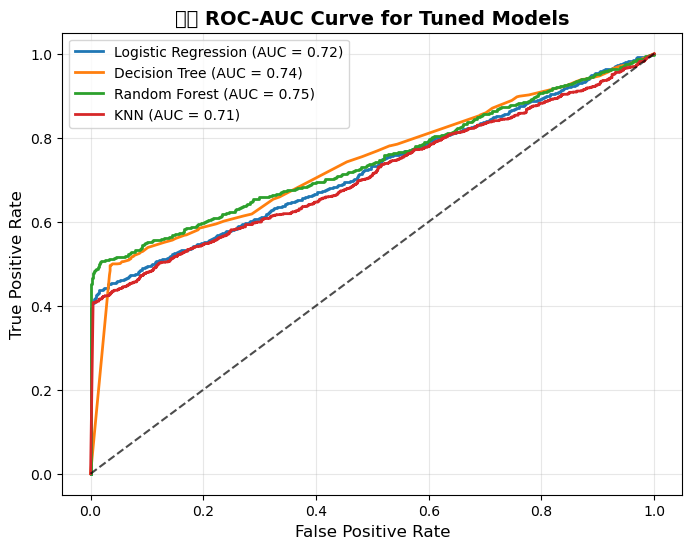

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.634545,0.691660,0.692720,0.692190,0.723719
1,Decision Tree,0.669091,0.795897,0.594636,0.680702,0.740489
2,Random Forest,0.683636,0.853659,0.563218,0.678670,0.746846
3,KNN,0.626364,0.700415,0.646743,0.672510,0.710274


In [16]:
# Hyperparameter grids
param_grids = {
    "Logistic Regression": {"C": [0.1, 1, 10], "solver": ["liblinear", "lbfgs"]},
    "Decision Tree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    "KNN": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
}

# Find best hyperparameters before training
best_models = {}
for name, model in {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")

# Train and evaluate models
results = []
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Performance metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 0
    
    results.append([name, acc, prec, rec, f1, auc])
    
    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1 Score: {f1:.2f}, ROC-AUC: {auc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
       
# Store results in a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])


# \ud83d\udccc Store results in a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])

# \ud83c\udfa8  ROC-AUC Plot
plt.figure(figsize=(8, 6))
for name, model in best_models.items():
    if hasattr(model, "predict_proba"):  # Only plot if model supports predict_proba
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})", linewidth=2)

plt.plot([0, 1], [0, 1], linestyle="--", color='black', alpha=0.7)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("\ud83d\ude80 ROC-AUC Curve for Tuned Models", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# \ud83d\udcca Show results neatly
print("\n\ud83d\udccc Model Performance Summary:")
display(results_df.style.background_gradient(cmap="coolwarm", subset=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]))


<h2 style="color: darkblue; font-size: 25px;text-align: center;">📌 Model Performance Summary</h2>
<p style="font-size: 15px;">Below is the performance summary of the models after hyperparameter tuning, displayed using a heatmap for better visualization.</p>

<h2 style="color: darkpurple; font-size: 20px;">🔍 Cross-Validation for Best Model</h2>
<p style="font-size: 18px;">To ensure the selected best model generalizes well, we conduct <b>cross-validation</b> on the entire dataset:</p>

<p style="font-size: 15px; color: darkblue;">This ensures that our model selection is validated with multiple train-test splits.</p>

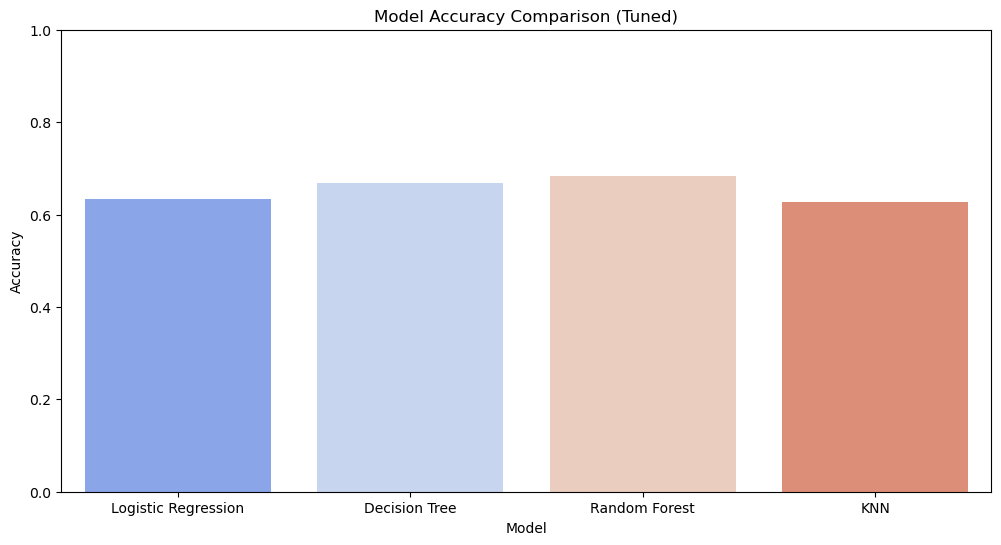


Performance Comparison Table:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.634545   0.691660  0.692720  0.692190  0.723719
1        Decision Tree  0.669091   0.795897  0.594636  0.680702  0.740489
2        Random Forest  0.683636   0.853659  0.563218  0.678670  0.746846
3                  KNN  0.626364   0.700415  0.646743  0.672510  0.710274

Cross-Validation Accuracy for Best Model (Random Forest): 0.60

Cross-Validation Accuracy for Best Model (Random Forest): 0.59


In [17]:
# Accuracy Comparison Plot
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=df_results, palette="coolwarm")
plt.title("Model Accuracy Comparison (Tuned)")
plt.ylim(0, 1)
plt.show()

# Display Performance Table
print("\nPerformance Comparison Table:")
print(df_results)

# Cross-validation for best model
best_model_name = df_results.sort_values(by="ROC-AUC", ascending=False).iloc[0]["Model"]
best_model = best_models[best_model_name]
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy for Best Model ({best_model_name}): {np.mean(cv_scores):.2f}")

best_model_name = df_results.sort_values(by="ROC-AUC", ascending=False).iloc[0]["Model"]
best_model = best_models[best_model_name]
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy for Best Model ({best_model_name}): {np.mean(cv_scores):.2f}")

<h2 style="color: darkblue; font-size: 25px;text-align: center;"## Feature Importance Analysis (Random Forest)</h2>
<h2 style="color: darkpurple; font-size: 20px;">🔍 Feature Importance</h2>
<p style="font-size: 18px;">Feature importance helps determine which features contribute most to predicting the target variable. This analysis provides several benefits:</p>

<p style="font-size: 15px; color: darkblue;">- Improves Model Performance
     By focusing on the most significant features, we can reduce noise and improve accuracy.
- Enhances Interpretability: Helps in understanding which features drive predictions.
- **Feature Selection**: Unimportant features can be removed to optimize the model.</p>



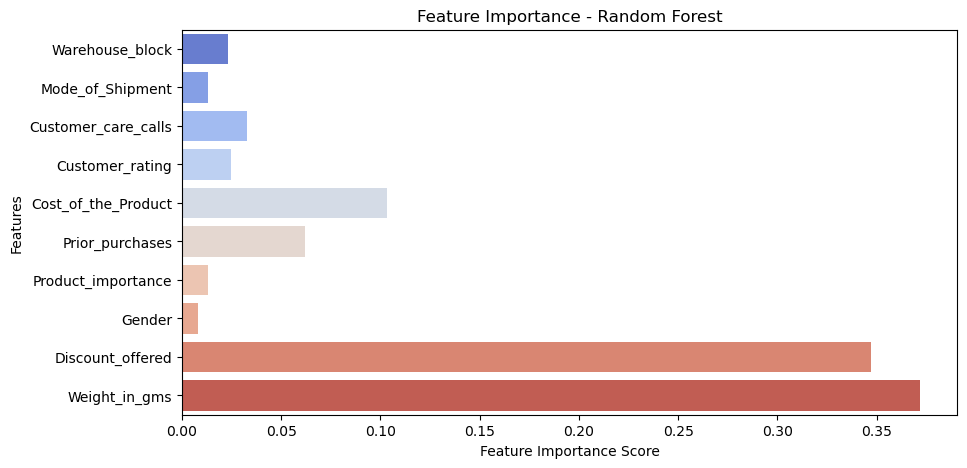

In [19]:
# Check if 'Random Forest' is in the trained models dictionary
if 'Random Forest' in best_models:  
    rf_model = best_models['Random Forest']  # Get the best trained model
    
    # Ensure model is trained before accessing feature importances
    if hasattr(rf_model, "feature_importances_"):
        feature_importances = rf_model.feature_importances_
        features = X.columns

        # Plot feature importance
        plt.figure(figsize=(10, 5))
        sns.barplot(x=feature_importances, y=features, palette='coolwarm')
        plt.title("Feature Importance - Random Forest")
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Features")
        plt.show()
    else:
        print("Error: Model is not trained properly.")
else:
    print("Error: Random Forest model not found in trained models.")

<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
📊 Model Performance Evaluation
</h1>

<p style="font-size: 15px; color: darkblue;">
After training and evaluating various models, we analyze their performance using key metrics such as Accuracy, Precision, Recall, F1 Score, and ROC-AUC.
</p>



In [20]:
# Train and evaluate models
results = []
best_model = None
best_auc = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
      # Performance metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 0

    results.append([name, acc, prec, rec, f1, auc])

    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {auc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Track best model
    if auc > best_auc:
        best_auc = auc
        best_model = model


Logistic Regression Model Performance:
Accuracy: 0.63
Precision: 0.69
Recall: 0.69
F1 Score: 0.69
ROC-AUC Score: 0.72
Confusion Matrix:
 [[492 403]
 [402 903]]

Decision Tree Model Performance:
Accuracy: 0.64
Precision: 0.70
Recall: 0.70
F1 Score: 0.70
ROC-AUC Score: 0.63
Confusion Matrix:
 [[494 401]
 [391 914]]

Random Forest Model Performance:
Accuracy: 0.68
Precision: 0.78
Recall: 0.64
F1 Score: 0.70
ROC-AUC Score: 0.75
Confusion Matrix:
 [[657 238]
 [469 836]]

KNN Model Performance:
Accuracy: 0.63
Precision: 0.70
Recall: 0.66
F1 Score: 0.68
ROC-AUC Score: 0.71
Confusion Matrix:
 [[530 365]
 [450 855]]


<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
📊 Model Accuracy Comparison
</h1>

<p style="font-size: 15px; color: darkblue;">
The following bar chart visually compares the accuracy of different models after training and evaluation.
</p>

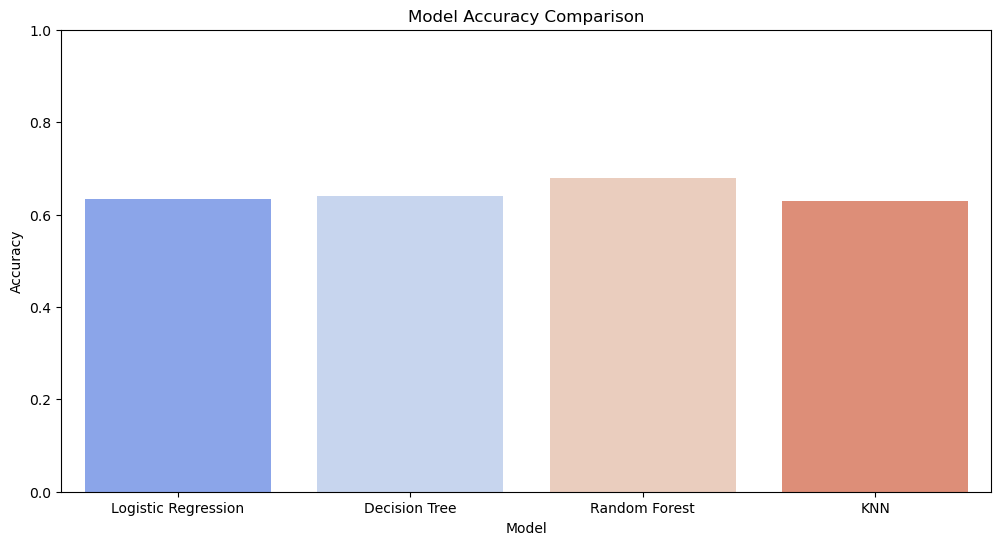

In [21]:
# Accuracy Comparison Plot
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=df_results, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()



<h2 style="color: navy; text-align: center;font-size: 25px;">📊 Confusion Matrix Interpretation</h2>
<p style="font-size: 15px; color: darkblue;">
The confusion matrix visually represents the performance of the best model by displaying the count of correct and incorrect classifications.
It helps to analyze model errors beyond accuracy.
</p>

<h3 style="color: darkred; font-size: 20px;">🔍 Understanding the Confusion Matrix</h3>
<p style="font-size: 15px;">
The confusion matrix consists of four key elements:
</p>

<table style="border-collapse: collapse; font-size: 15px;">
    <tr style="background-color: lightgray;">
        <th style="padding: 10px; border: 1px solid black;"> </th>
        <th style="padding: 10px; border: 1px solid black;">Predicted: Not Reached</th>
        <th style="padding: 10px; border: 1px solid black;">Predicted: Reached</th>
    </tr>
    <tr>
        <th style="padding: 10px; border: 1px solid black;">Actual: Not Reached</th>
        <td style="padding: 10px; border: 1px solid black; color: green;"><b>True Negative (TN)</b><br>Correctly classified as "Not Reached".</td>
        <td style="padding: 10px; border: 1px solid black; color: red;"><b>False Positive (FP)</b><br>Incorrectly classified as "Reached".</td>
    </tr>
    <tr>
        <th style="padding: 10px; border: 1px solid black;">Actual: Reached</th>
        <td style="padding: 10px; border: 1px solid black; color: red;"><b>False Negative (FN)</b><br>Incorrectly classified as "Not Reached".</td>
        <td style="padding: 10px; border: 1px solid black; color: green;"><b>True Positive (TP)</b><br>Correctly classified as "Reached".</td>
    </tr>
</table>

<h3 style="color: darkgreen; font-size: 15px;">📌 Key Observations</h3>
<ul style="font-size: 15px; color: darkblue;">
    <li>✅ <b>True Positives (TP):</b> Cases correctly identified as "Reached".</li>
    <li>✅ <b>True Negatives (TN):</b> Cases correctly classified as "Not Reached".</li>
    <li>❌ <b>False Positives (FP):</b> Cases where "Not Reached" was misclassified as "Reached".</li>
    <li>❌ <b>False Negatives (FN):</b> Cases where "Reached" was misclassified as "Not Reached".</li>
</ul>

<p style="font-size: 15px; color: darkblue;">
This analysis helps in fine-tuning our model by optimizing the tradeoff between <b>Precision</b> and <b>Recall</b>. 🚀
</p>

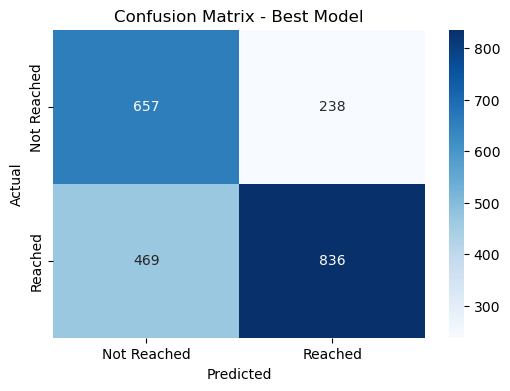

In [22]:
# Confusion Matrix Plot (for best model)
y_best_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_best_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Reached', 'Reached'], yticklabels=['Not Reached', 'Reached'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()



<h2 style="color: navy; font-size: 25px;text-align: center;">🔍 Cross-Validation for Stability Check</h2>
<p style="font-size: 15px; color: darkblue;">
To ensure that our best model generalizes well across different datasets, we use <b>k-fold cross-validation</b>. This process evaluates model stability and reduces bias by splitting data into multiple training and testing sets.
</p>



In [23]:
# Cross-validation for stability check
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy for Best Model: {np.mean(cv_scores):.2f}")


Cross-Validation Accuracy for Best Model: 0.60


<h3 style="color: darkred; font-size: 25px;text-align: center;">📌  Cross-Validation</h3>
<ul style="font-size: 15px;">
    <li>✅ Prevents overfitting by testing on multiple data subsets.</li>
    <li>✅ Provides a reliable estimate of model performance.</li>
    <li>✅ Ensures that our selected model generalizes well.</li>
</ul>




<h1 style="color: navy; text-align: center; font-size: 25px; background-color: #f4f4f4; padding: 10px; border-radius: 10px;">
⚙️ Hyperparameter Tuning for Best Model
</h1>

<p style="font-size: 15px; color: darkblue;">
Hyperparameter tuning is crucial for optimizing model performance. We use <b>GridSearchCV</b> to explore different hyperparameter combinations and select the best-performing model based on the <b>ROC-AUC</b> score.
</p>

<h2 style="color: darkred; font-size: 20px;">🎯  Hyperparameters</h2>
<ul style="font-size: 15px;">
    <li>🔹 Improves model accuracy and generalization.</li>
    <li>🔹 Helps prevent overfitting or underfitting.</li>
    <li>🔹 Automates the selection of optimal hyperparameter values.</li>
</ul>
<p style="font-size: 15px; color: darkblue;">
Hyperparameter tuning ensures that we use the most efficient model configuration. By saving the best model, we can deploy it for real-world applications without re-training.
</p>

In [26]:
# Hyperparameter Tuning for best model 
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"\nBest Hyperparameters: {grid_search.best_params_}")





Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [28]:
# Save the trained model and preprocessing tools
joblib.dump(rf_model, "best_model.pkl")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(label_encoders, "label_encoders.pkl")

print("Random Forest model saved successfully.")

Random Forest model saved successfully.
